In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.neuronsimlib as tns
import mylibrary.nnlib as tnn

## Generate Datasets

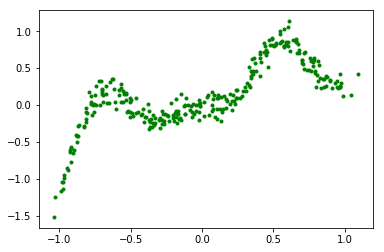

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Test Dynamic Network

In [3]:
net = tns.NeuralNetwork(1,1)

In [4]:
yout = net.forward(xx)
yout.shape

(300, 1)

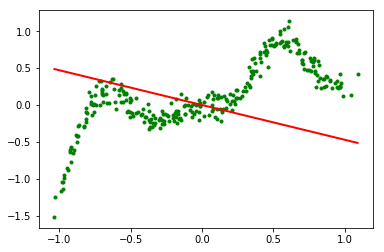

In [5]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, yout.reshape(-1), color='r', lw=2)

## Training Linear Regression with this network

_______________________
epoch 0
Loss 0.22812348944866342

_______________________
epoch 100
Loss 0.13449923524480192

_______________________
epoch 200
Loss 0.08975022561596938

_______________________
epoch 300
Loss 0.06729593441174582

_______________________
epoch 400
Loss 0.05587605822706784

_______________________
epoch 500
Loss 0.05004726430058156

_______________________
epoch 600
Loss 0.04706939715557575

_______________________
epoch 700
Loss 0.04554766103534607

_______________________
epoch 800
Loss 0.04476997992969909

_______________________
epoch 900
Loss 0.04437254033548045

_______________________
epoch 1000
Loss 0.044169425030155154

_______________________
epoch 1100
Loss 0.04406562088966941

_______________________
epoch 1200
Loss 0.044012570712745905

_______________________
epoch 1300
Loss 0.043985458870342505

_______________________
epoch 1400
Loss 0.043971603082169665

_______________________
epoch 1500
Loss 0.04396452193791933

_______________________
epoch 16


_______________________
epoch 13600
Loss 0.04395712042654267

_______________________
epoch 13700
Loss 0.04395712042654267

_______________________
epoch 13800
Loss 0.04395712042654267

_______________________
epoch 13900
Loss 0.04395712042654267

_______________________
epoch 14000
Loss 0.04395712042654267

_______________________
epoch 14100
Loss 0.04395712042654267

_______________________
epoch 14200
Loss 0.04395712042654267

_______________________
epoch 14300
Loss 0.04395712042654267

_______________________
epoch 14400
Loss 0.04395712042654267

_______________________
epoch 14500
Loss 0.04395712042654267

_______________________
epoch 14600
Loss 0.04395712042654267

_______________________
epoch 14700
Loss 0.04395712042654267

_______________________
epoch 14800
Loss 0.04395712042654267

_______________________
epoch 14900
Loss 0.04395712042654267

_______________________
epoch 15000
Loss 0.04395712042654267

_______________________
epoch 15100
Loss 0.04395712042654267

_______

TclError: invalid command name "pyimage62"

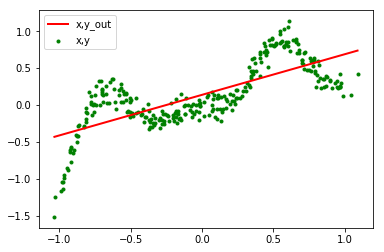

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plt.ion()
# fig.show()

for step in range(100000):
    
    y_out = net.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    
    dy = tnn.MseLoss.del_loss(y_out, yy)
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break